In [1]:
# Import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem
import numpy as np

In [2]:
clinical_trial_df = 'raw_data/clinicaltrial_data.csv'
clinical_trial_df = pd.read_csv(clinical_trial_df)

In [3]:
mouse_drug_df = 'raw_data/mouse_drug_data.csv'
mouse_drug_df = pd.read_csv(mouse_drug_df)

In [4]:
clinical_mouseDrug_df = pd.merge(clinical_trial_df, mouse_drug_df, on = 'Mouse ID')
clinical_mouseDrug_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [5]:
drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
mouse_drugResponse_df = clinical_mouseDrug_df.loc[clinical_mouseDrug_df['Drug'].isin(drug)]
mouse_drugResponse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
tumorVolume_df = pd.DataFrame(mouse_drugResponse_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
tumorVolume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [7]:
tumorVolume_df.reset_index(inplace=True)
tumorVolume_pivot_df = tumorVolume_df.pivot(index='Timepoint', columns = 'Drug', values ='Tumor Volume (mm3)')
tumor_response_df = pd.DataFrame(tumorVolume_pivot_df.to_records())
tumor_response_df

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


In [8]:
tumor_response_melt = tumor_response_df.melt('Timepoint', var_name='Drug',  value_name='Tumer Volume (mm3)')
tumor_response_melt.shape

(40, 3)

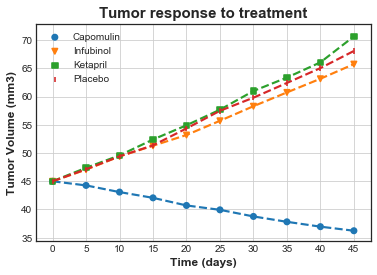

In [58]:
# Scatter plot for tumor volume over treatment 
sns.set_style("white")

sns.pointplot(x="Timepoint", y="Tumer Volume (mm3)", hue='Drug', size=5, aspect=1.5, scale = .8,
               markers=['o', 'v', 's', '|']*100,linestyles = "dashed", legend=False, data=tumor_response_melt)

# Set title
plt.title('Tumor response to treatment', weight='bold').set_fontsize('15')

# Set x-axis label
plt.xlabel('Time (days)', weight= 'bold').set_fontsize('12')

# Set y-axis label
plt.ylabel('Tumor Volume (mm3)', weight='bold').set_fontsize('12')

plt.grid()
plt.legend(loc='best')
plt.show()

In [10]:
tumorVolume_error = pd.DataFrame(mouse_drugResponse_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem())
tumorVolume_error.reset_index(inplace=True)
tumorVolume_error_pivot = tumorVolume_error.pivot(index='Timepoint', columns = 'Drug', values ='Tumor Volume (mm3)')
tumorVolume_error_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [11]:
tumorVolume_error_pivot = pd.DataFrame(tumorVolume_error_pivot.to_records())
tumorVolume_error_melt = tumorVolume_error_pivot.melt('Timepoint', var_name='Drug',  value_name='Standard Errors')
tumorVolume_error_melt.shape

(40, 3)

In [12]:
tumor_response_df = pd.merge(tumor_response_melt, tumorVolume_error_melt, on =("Timepoint", "Drug"))
tumor_response_df.head()

,Timepoint,Drug,Tumer Volume (mm3),Standard Errors
0,0,Capomulin,45.000000,0.000000
1,5,Capomulin,44.266086,0.448593
2,10,Capomulin,43.084291,0.702684
3,15,Capomulin,42.064317,0.838617
4,20,Capomulin,40.716325,0.909731


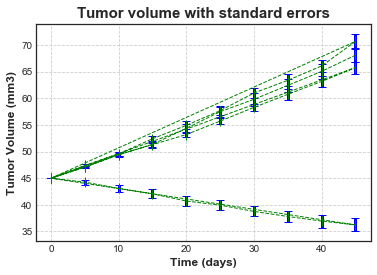

In [34]:
# Error bar for tumor volumes 

plt.errorbar('Timepoint', 'Tumer Volume (mm3)', yerr='Standard Errors', data = tumor_response_df, color='g',
             fmt ='|', ecolor='blue', capsize=4, elinewidth=3, markersize=10, 
             linestyle='dashed', linewidth=1)

plt.title('Tumor volume with standard errors', weight='bold').set_fontsize('15')

# Set x-axis label
plt.xlabel('Time (days)', weight= 'bold').set_fontsize('12')

# Set y-axis label
plt.ylabel('Tumor Volume (mm3)', weight='bold').set_fontsize('12')

plt.grid()
plt.show()

In [14]:
metastatic_df = pd.DataFrame(mouse_drugResponse_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())
metastatic_df.reset_index(inplace=True)
metastatic_pivot_df = metastatic_df.pivot(index='Timepoint', columns = 'Drug', values ='Metastatic Sites')
metastatic_sites_df = pd.DataFrame(metastatic_pivot_df.to_records())
metastatic_sites_df.head()

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


In [15]:
metastatic_sites_melt = metastatic_sites_df.melt('Timepoint', var_name='Drug',  value_name='Metastatic Sites')
metastatic_sites_melt.shape

(40, 3)

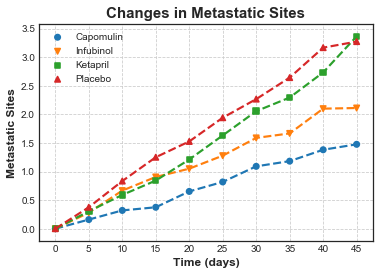

In [16]:
# Scatter plot for metastatic sites over time 

sns.set_style("white", {'grid.linestyle': '--'})

sns.pointplot(x="Timepoint", y="Metastatic Sites", hue='Drug', markers=['o', 'v', 's', '^']*100, 
               size =5, aspect=1.5, scale = .8, gridsize =15, linestyles = "dashed", legend=False,
               data=metastatic_sites_melt)

# Set title
plt.title('Changes in Metastatic Sites', weight='bold').set_fontsize('15')

# Set x-axis label
plt.xlabel('Time (days)', weight='bold').set_fontsize('12')

# Set y-axis label
plt.ylabel('Metastatic Sites', weight='bold').set_fontsize('12')

plt.grid()
plt.legend(loc='best')
plt.show()

In [17]:
metastatic_error = pd.DataFrame(mouse_drugResponse_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem())
metastatic_error.reset_index(inplace=True)
metastatic_error_pivot = metastatic_error.pivot(index='Timepoint', columns = 'Drug', values ='Metastatic Sites')
metastatic_error_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [35]:
metastatic_error_pivot = pd.DataFrame(metastatic_error_pivot.to_records())
metastatic_error_melt = metastatic_error_pivot.melt('Timepoint', var_name='Drug',  value_name='Standard Errors')

,Timepoint,Drug,Standard Errors
0,0,index,0.0
1,5,index,1.0
2,10,index,2.0
3,15,index,3.0
4,20,index,4.0


In [36]:
metastatic_sites_df = pd.merge(metastatic_sites_melt, metastatic_error_melt, on =("Timepoint", "Drug"))
metastatic_sites_df.head()

,Timepoint,Drug,Metastatic Sites,Standard Errors
0,0,Capomulin,0.000000,0.000000
1,5,Capomulin,0.160000,0.074833
2,10,Capomulin,0.320000,0.125433
3,15,Capomulin,0.375000,0.132048
4,20,Capomulin,0.652174,0.161621


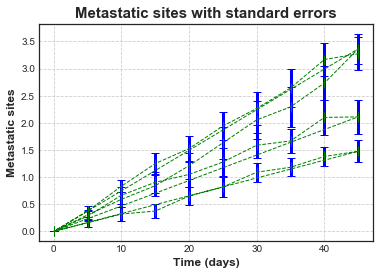

In [40]:
# Plot error bar for metastatic sites 
plt.errorbar('Timepoint', 'Metastatic Sites', yerr='Standard Errors', data = metastatic_sites_df, color='g',
             fmt ='|', ecolor='blue', capsize=4, elinewidth=3, markersize=10, 
             linestyle='dashed', linewidth=1)

plt.title('Metastatic sites with standard errors', weight='bold').set_fontsize('15')

# Set x-axis label
plt.xlabel('Time (days)', weight= 'bold').set_fontsize('12')

# Set y-axis label
plt.ylabel('Metastatic sites', weight='bold').set_fontsize('12')

plt.grid()
plt.show()

In [20]:
# Compute survival counts at different time points for different treatment 
mice_survival_df = pd.DataFrame(mouse_drugResponse_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count())
mice_survival_df.rename(columns={'Mouse ID': 'Mouse Count'}, inplace=True)

In [21]:
mice_survival_df.reset_index(inplace=True)
mice_survival_pivot_df = mice_survival_df.pivot(index='Timepoint', columns = 'Drug', values ='Mouse Count')

In [22]:
mice_survival_count_df = pd.DataFrame(mice_survival_pivot_df.to_records())
mice_survival_count_df.head()

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19


In [23]:
# Compute survival rate 
index = np.arange(0,10,1)
columns = ['Timepoint', 'Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
survival_rate_df = pd.DataFrame(index=index, columns=columns)
survival_rate_df['Timepoint'] = mice_survival_count_df['Timepoint']
survival_rate_df['Capomulin'] = mice_survival_count_df['Capomulin']*100/25
survival_rate_df['Infubinol'] = mice_survival_count_df['Infubinol']*100/25
survival_rate_df['Ketapril'] = mice_survival_count_df['Ketapril']*100/25
survival_rate_df['Placebo'] = mice_survival_count_df['Placebo']*100/25
survival_rate_df.head()

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,100.0,100.0,100.0,100.0
1,5,100.0,100.0,92.0,96.0
2,10,100.0,84.0,88.0,96.0
3,15,96.0,84.0,76.0,80.0
4,20,92.0,80.0,76.0,76.0


In [24]:
survival_rate_melt = survival_rate_df.melt('Timepoint', var_name='Drug',  value_name='Survival Rate (%)')

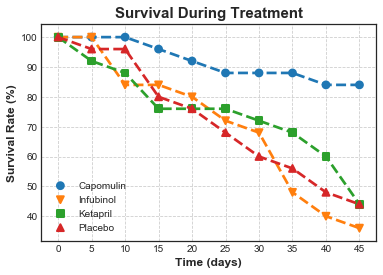

In [25]:
# Plot for survival rate during treatment 

sns.set_style("white",{'grid.linestyle': '--'})

g = sns.pointplot(x="Timepoint", y="Survival Rate (%)", hue='Drug', linestyles = "dashed", gridsize=15, 
                  markers=['o', 'v', 's', '^']*100, scale = 1,legend=False, data=survival_rate_melt)

# Set title
plt.title('Survival During Treatment', weight='bold').set_fontsize('15')

# Set x-axis label
plt.xlabel('Time (days)', weight='bold').set_fontsize('12')

# Set y-axis label
plt.ylabel('Survival Rate (%)', weight='bold').set_fontsize('12')

plt.grid()
plt.legend(loc='best')
g.set(alpha =0.7)
plt.show()

In [57]:
# Compute total % volume change in tumor over 45 day treatment 
# Tumor volume at day 45
val_45 = pd.DataFrame(tumor_response_df[tumor_response_df.Timepoint==45]['Tumer Volume (mm3)'])

# Tumor volume at day one
val_0 = pd.DataFrame(tumor_response_df[tumor_response_df.Timepoint==0]['Tumer Volume (mm3)'])

val_45['Drug'] = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
val_0['Drug'] = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

# Merge two dataframes 
val = pd.merge(val_0, val_45, on ='Drug')
val.rename(columns = {'Tumer Volume (mm3)_x': 'Tumer_day1', 'Tumer Volume (mm3)_y': 'Tumer_day45'}, inplace=True)
# computing the percent change 
val['total_per_change'] = round((val['Tumer_day45']-val['Tumer_day1'])*100/val['Tumer_day1'],2)
per_vol_change = val.loc[:, ('Drug', 'total_per_change')]
per_vol_change

,Drug,total_per_change
0,Capomulin,-19.48
1,Infubinol,46.12
2,Ketapril,57.03
3,Placebo,51.30


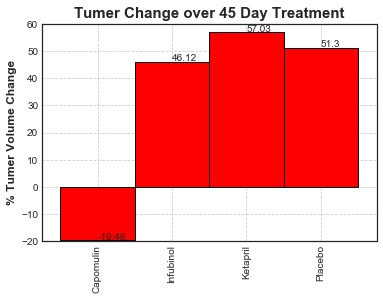

In [54]:
# Bar chart for total % change in tumor volume over 45 day treatment

treatment = per_vol_change['Drug']
bars_treatment = per_vol_change['total_per_change']
x_axis = np.arange(len(bars_treatment))
tick_locations = [value for value in x_axis]

ax = per_vol_change.plot(kind='bar', width= 1, legend=False, color='r', edgecolor='black')
                        
ax.set_ylim(-20, 60)
for i, label in enumerate(list(per_vol_change.index)):
    total_per_change = per_vol_change.loc[label]['total_per_change']
    ax.annotate(str(total_per_change), (i, total_per_change + 0.2))

plt.xticks(tick_locations, drug)
plt.title('Tumer Change over 45 Day Treatment', weight='bold').set_fontsize('15')

plt.ylabel('% Tumer Volume Change', weight='bold').set_fontsize('12')
plt.grid()
plt.show()